In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

In [2]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [3]:
df = pd.read_csv("./data/raw/covid-19-data/us-counties.csv")

In [4]:
#Fix date
from datetime import datetime
def fixdata(row):
    row['date'] = datetime.strptime(row['date'], '%Y-%m-%d')
    return row
df = df.apply(fixdata, axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45880 entries, 0 to 45879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    45880 non-null  datetime64[ns]
 1   county  45880 non-null  object        
 2   state   45880 non-null  object        
 3   fips    45254 non-null  float64       
 4   cases   45880 non-null  int64         
 5   deaths  45880 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [5]:
df = df[df['cases'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45852 entries, 0 to 45879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    45852 non-null  datetime64[ns]
 1   county  45852 non-null  object        
 2   state   45852 non-null  object        
 3   fips    45254 non-null  float64       
 4   cases   45852 non-null  int64         
 5   deaths  45852 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.4+ MB


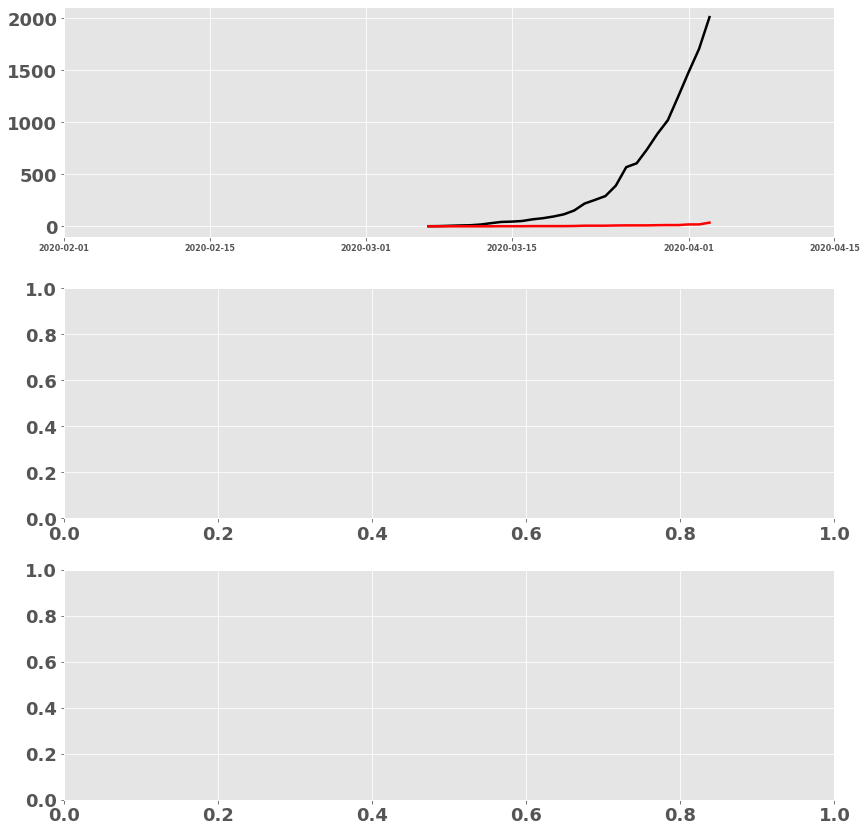

In [194]:
import datetime
pd.set_option('display.max_rows', 10)

pd.set_option('display.max_rows', 10)
ca = df[df['state'] == 'Virginia']
grouped = ca.groupby('date')

fig, ax = plt.subplots(3,1, figsize=(12,12))
fig.tight_layout()
ax[0].set_xlim([datetime.date(2020, 2, 1), datetime.date(2020, 4, 15)])
ax[0].tick_params(axis='x', labelsize=8)
cases = grouped['cases'].agg([np.sum])['sum']
deaths = grouped['deaths'].agg([np.sum])['sum']
xxx = ax[0].plot(cases.index, cases.values, linewidth=2.5, zorder=2, color='black')
xxx = ax[0].plot(deaths.index, deaths.values, linewidth=2.5, zorder=2, color='red')


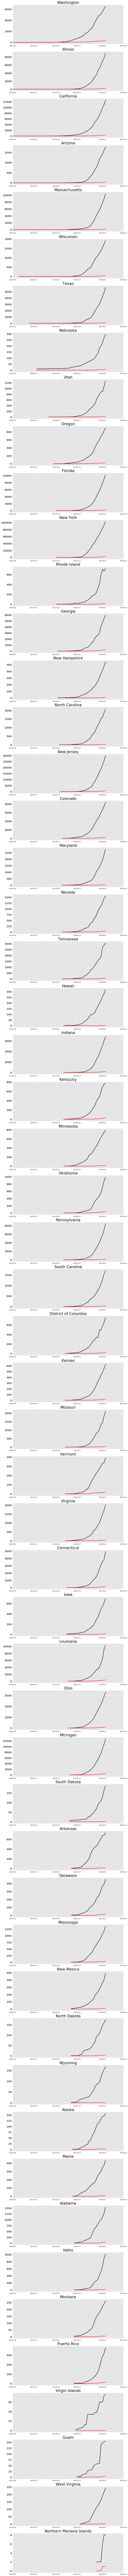

In [114]:
fig, axs = plt.subplots(55,1, figsize=(12,250))
fig.tight_layout()

def print_lines(ax, input_df, state):
    sdf = input_df[input_df['state'] == state]
    grouped = sdf.groupby('date')
    ax.set_xlim([datetime.date(2020, 2, 1), datetime.date(2020, 4, 15)])
    ax.tick_params(axis='x', labelsize=8)
    cases = grouped['cases'].agg([np.sum])['sum']
    deaths = grouped['deaths'].agg([np.sum])['sum']
    xxx = ax.plot(cases.index, cases.values, linewidth=2.5, zorder=2, color='black')
    xxx = ax.plot(deaths.index, deaths.values, linewidth=2.5, zorder=2, color='red')
    ax.set_title(state)
#print_lines(axs[0], df, 'California')
#print_lines(axs[1], df, 'Kansas')
#print_lines(axs[2], df, 'New York')
i=0
for state in df.state.unique():
    print_lines(axs[i], df, state)
    i += 1


In [126]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression()

ca = df[df['state'] == 'California']
grouped = ca.groupby('date')

X = np.array(cases.index).reshape(70,1) 
cases = grouped['cases'].agg([np.sum])['sum']
deaths = grouped['deaths'].agg([np.sum])['sum']

#print(cases.shape, dates.shape)
lin.fit(X, cases)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

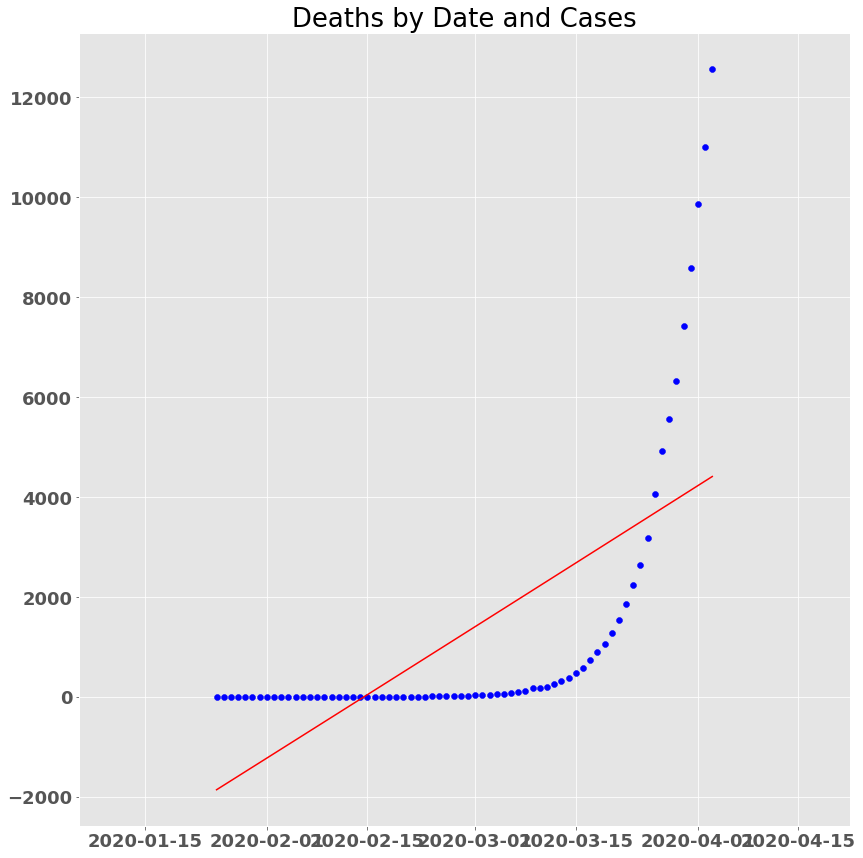

In [193]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

lin = LinearRegression()
ca = df[df['state'] == 'California']
grouped = ca.groupby('date')
cases = grouped['cases'].agg([np.sum])['sum']
deaths = grouped['deaths'].agg([np.sum])['sum']
a = np.array(cases.index)
b = np.array(cases.values)

X = a.reshape(70,1)
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, cases) 
lin2 = LinearRegression() 
lin2.fit(X_poly, cases) 
y = lin2.predict(poly.fit_transform(X)).reshape(70,1)

fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, cases, color = 'blue') 
  
plt.plot(X, y, color = 'red') 
plt.title('Deaths by Date and Cases') 
  
plt.show() 

In [152]:
a = np.array([1,2,3])
b = np.array(['a', 2, 4])
np.hstack((a,b))

array(['1', '2', '3', 'a', '2', '4'], dtype='<U11')

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from datetime import date

def days_since_1jan(dt):
    return (dt - datetime.datetime(2020,1,1)).days


ca = df[df['county'] == 'San Francisco']
ca = ca[ca['cases'] > 10]
grouped = ca.groupby('date')
cases = grouped['cases'].agg([np.sum])['sum'].reset_index()
deaths = grouped['deaths'].agg([np.sum])['sum'].reset_index()
y = cases.iloc[:,1]
X = cases.iloc[:,0].apply(days_since_1jan)
X = X[:, np.newaxis]
y = y[:, np.newaxis]

#print(y)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)

fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'blue', label="actual data") 
#print(X)
y1 = lin.predict(X_poly)
#print(y1)
plt.plot(X, y1, color = 'red', label="model prediction") 
plt.title('Cases in SF by days from 1 Jan') 
ax.legend()
  
plt.show() 

NameError: name 'datetime' is not defined

In [8]:
%load_ext autoreload
%autoreload 2

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from src.poly_reg import model_county
from src.poly_reg import model_state
from src.data_import import extract_nyt

plt.style.use('ggplot')
font = {'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)


df = extract_nyt()
print('done')

done


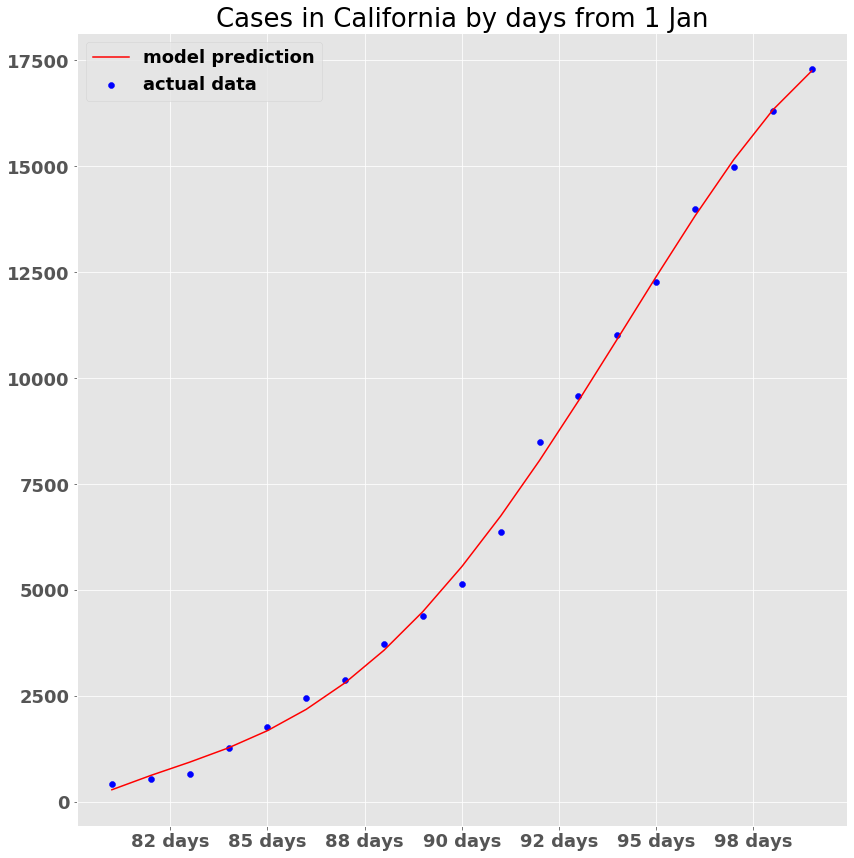

In [20]:
state = "California"
df2 = df[df['cases'] > 40000000/100000]
X, X_poly, y, lin = model_state(df2, state, degree=4)

fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'blue', label="actual data") 
#print(X)
y1 = lin.predict(X_poly)
#print(y1)
plt.plot(X, y1, color = 'red', label="model prediction") 
plt.title('Cases in {} by days from 1 Jan'.format(state)) 
ax.legend()
xlabels = ['{:,.0f}'.format(x) + ' days' for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)

  
plt.show() 

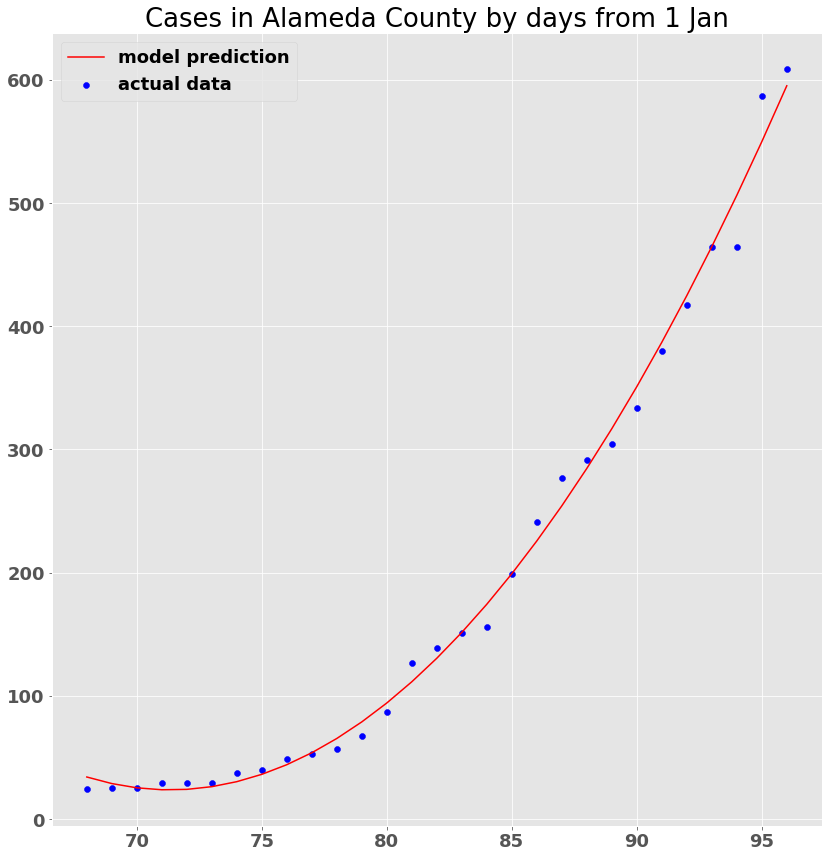

In [13]:
county = "Alameda"
state = "California"
X, X_poly, y, lin = model_county(df, county, state)

fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'blue', label="actual data") 
#print(X)
y1 = lin.predict(X_poly)
#print(y1)
plt.plot(X, y1, color = 'red', label="model prediction") 
plt.title('Cases in {} County by days from 1 Jan'.format(county)) 
ax.legend()
  
plt.show() 

In [7]:
params = []
for state in df.state.unique():
    X, X_poly, y, lin = model_state(df, state)
    if not X is None:
        params.append([state, lin.intercept_[0], lin.coef_[0][1], lin.coef_[0][2]])
    #print(lin.coef_[0])
params

[['Washington', 37588.644544178074, -1142.8204020243697, 8.683592755283494],
 ['Illinois', 125160.68488398322, -3400.6775213670253, 23.05695970695691],
 ['California', 73915.8080479204, -2231.9861354267523, 16.693014370644754],
 ['Arizona', 33123.803921571285, -880.0857843137807, 5.840686274510085],
 ['Massachusetts', 161658.66515259573, -4340.03833333266, 29.05772283271904],
 ['Wisconsin', 24137.970027335334, -660.2633059921322, 4.516803372065906],
 ['Texas', 38588.64563176616, -1131.4225486211787, 8.215751023026879],
 ['Nebraska', 771.8138346486136, -24.452425380481966, 0.19392210418497835],
 ['Utah', 18269.511028563655, -490.8155130911311, 3.2998900413094474],
 ['Oregon', 13415.55557669156, -360.7861065708501, 2.4285268507241455],
 ['Florida', 188454.11180122383, -4992.126199886707, 33.030208921511594],
 ['Georgia', 108965.13239623397, -2848.0655591554923, 18.612975125565427],
 ['New Hampshire', 12774.082559334407, -328.5268317852281, 2.116099071206758],
 ['North Carolina', 35719.80

In [8]:
params = []
for county in df.county.unique():
    #print("trying: {}".format(county))
    X, X_poly, y, lin = model_county(df, county)
    if not X is None:
        params.append([county, lin.intercept_[0], lin.coef_[0][1], lin.coef_[0][2]])
    #print(lin.coef_[0])
params

[['Snohomish', 7969.730365089076, -244.2679753297474, 1.8776964484348277],
 ['Cook', 91124.79189253542, -2481.2945299141707, 16.863369963368058],
 ['Orange', 61764.60869564754, -1652.3577075097785, 11.049407114623941],
 ['Maricopa', 19708.818627453147, -524.6728586171632, 3.488906088751368],
 ['Los Angeles', 51133.8645995608, -1425.5252363738598, 9.894257508343081],
 ['Santa Clara', 7104.1529077530595, -211.24765503706374, 1.5742032516817501],
 ['Suffolk', 192891.44034183424, -5192.449765885412, 34.88532144183943],
 ['San Francisco', 4649.431192370473, -132.64644646540367, 0.9482863879415157],
 ['Dane', 1033.61945304432, -36.25986842105253, 0.29960010319918096],
 ['San Diego', 18723.318933693165, -493.69961266792404, 3.266347687399685],
 ['Bexar', 2033.3675448557856, -59.52762948707344, 0.43404815695838866],
 ['Douglas', 1754.8648584646212, -56.028076372561124, 0.4430138449349404],
 ['Humboldt', 1510.1800865799323, -36.47467532467149, 0.22186147186144822],
 ['Sacramento', 5840.29728966

In [12]:
import csv

with open('./data/processed/counties_poly_params.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(params)

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from datetime import date

def days_since_1jan(dt):
    return (dt - datetime.datetime(2020,1,1)).days


ca = df[df['state'] == 'California']
grouped = ca.groupby('date')
cases = grouped['cases'].agg([np.sum])['sum'].reset_index()
deaths = grouped['deaths'].agg([np.sum])['sum'].reset_index()
y = cases.iloc[:,1]
X = cases.iloc[:,0].apply(days_since_1jan)
X = X[:, np.newaxis]
y = y[:, np.newaxis]

#print(y)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)

fig, ax = plt.subplots(figsize=(12,12))
fig.tight_layout()

plt.scatter(X, y, color = 'blue') 
#print(X)
y1 = lin.predict(X_poly)
#print(y1)
plt.plot(X, y1, color = 'red') 
plt.title('Cases in DE by days from 1 Jan') 
  
plt.show() 

NameError: name 'datetime' is not defined

10.120437473614711
0.8537647164420812


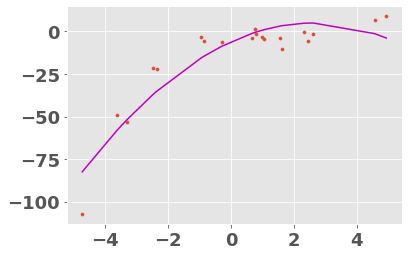

In [304]:

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()


In [1]:
import pandas as pd
import pyreadstat

In [2]:
df, meta = pyreadstat.read_sav("./Pew/Pathways March 2020 (ATP W63.5)/Pathways Mar 2020 (ATP W63.5).sav")

In [4]:
df

,QKEY,Device_Type_W63.5,LANG_W63.5,COVIDFOL_W63.5,COVIDCOVER1_W63.5,COVIDCOVER2_W63.5,COVIDCONF_a_W63.5,COVIDCONF_b_W63.5,COVIDCONF_c_W63.5,COVIDCONF_d_W63.5,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_ACSWEB,F_VOLSUM,WEIGHT_W63.5
0,1.001970e+05,3.0,1.0,2.0,1.0,1.0,4.0,3.0,2.0,2.0,...,2.0,NaN,2.0,3.0,3.0,1.0,3.0,1.0,1.0,0.326265
1,1.002600e+05,3.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,...,1.0,NaN,1.0,6.0,2.0,1.0,1.0,1.0,2.0,0.655627
2,1.003140e+05,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,4.0,2.0,1.0,3.0,1.0,1.0,0.432865
3,1.003630e+05,2.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,...,2.0,NaN,2.0,9.0,1.0,1.0,3.0,1.0,1.0,0.396183
4,1.004460e+05,1.0,1.0,1.0,2.0,2.0,3.0,4.0,2.0,2.0,...,2.0,NaN,2.0,8.0,1.0,1.0,4.0,1.0,1.0,0.392344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8909,2.019011e+11,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,2.0,...,3.0,1.0,1.0,8.0,1.0,1.0,3.0,1.0,1.0,0.129790
8910,2.019011e+11,2.0,1.0,1.0,2.0,1.0,4.0,4.0,2.0,3.0,...,2.0,NaN,2.0,2.0,3.0,1.0,5.0,1.0,2.0,0.317656
8911,2.019011e+11,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,...,1.0,NaN,1.0,1.0,3.0,1.0,3.0,1.0,2.0,0.257327
8912,2.019011e+11,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,3.0,1.0,1.0,4.0,2.0,1.0,3.0,1.0,2.0,1.843009
